In [1]:
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import cv2

In [4]:
from glob import glob

In [5]:
# extract path male & female im crop_data folder & put them in list
fpath = glob('./crop_data/female/*.jpg')
mpath = glob('./crop_data/male/*.jpg')

In [6]:
df_female = pd.DataFrame(fpath,columns=['filepath'])
df_female['gender'] = 'female' 

df_male = pd.DataFrame(mpath,columns=['filepath'])
df_male['gender'] = 'male' 

df = pd.concat((df_female, df_male), axis=0)

In [7]:
df.head()

,filepath,gender
0,./crop_data/female\female_0.jpg,female
1,./crop_data/female\female_1.jpg,female
2,./crop_data/female\female_100.jpg,female
3,./crop_data/female\female_1002.jpg,female
4,./crop_data/female\female_1005.jpg,female


In [9]:
df.tail()

,filepath,gender
2170,./crop_data/male\male_994.jpg,male
2171,./crop_data/male\male_996.jpg,male
2172,./crop_data/male\male_997.jpg,male
2173,./crop_data/male\male_998.jpg,male
2174,./crop_data/male\male_999.jpg,male


In [10]:
df.shape

(4761, 2)

In [11]:
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [12]:
df['dimension'] = df['filepath'].apply(get_size)

In [13]:
df.head(10)

,filepath,gender,dimension
0,./crop_data/female\female_0.jpg,female,273
1,./crop_data/female\female_1.jpg,female,273
2,./crop_data/female\female_100.jpg,female,122
3,./crop_data/female\female_1002.jpg,female,122
4,./crop_data/female\female_1005.jpg,female,182
5,./crop_data/female\female_1009.jpg,female,54
6,./crop_data/female\female_1010.jpg,female,81
7,./crop_data/female\female_1012.jpg,female,182
8,./crop_data/female\female_1017.jpg,female,273
9,./crop_data/female\female_1018.jpg,female,81


In [14]:
dist_gender = df['gender'].value_counts()

In [15]:
dist_gender

gender
female    2586
male      2175
Name: count, dtype: int64

<Axes: ylabel='count'>

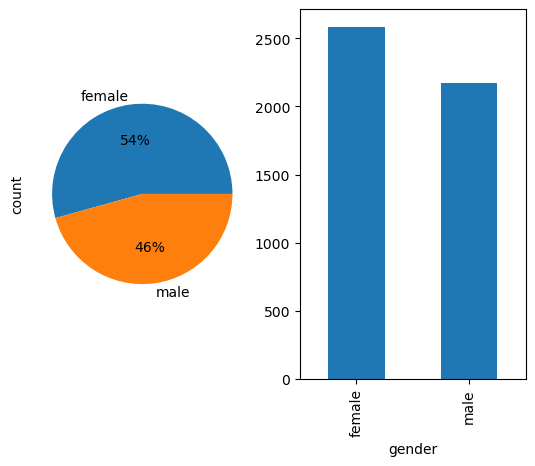

In [16]:
fig,ax = plt.subplots(nrows=1, ncols=2)
dist_gender.plot(kind='bar', ax = ax[1])
dist_gender.plot(kind='pie', ax = ax[0], autopct='%0.0f%%')

<Axes: xlabel='dimension', ylabel='Count'>

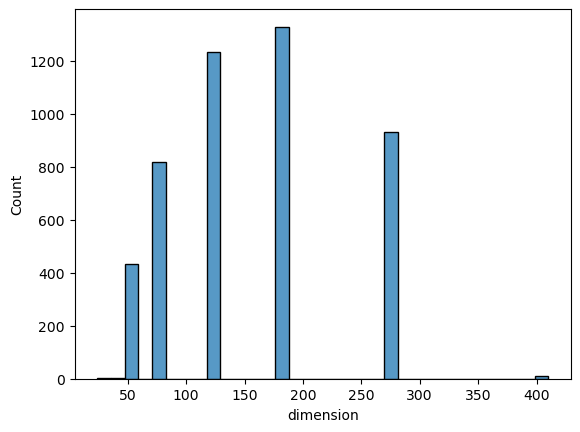

In [17]:
sns.histplot(df['dimension'])

In [18]:
df['dimension'].value_counts()

dimension
182    1329
122    1232
273     932
81      819
54      435
410       9
36        4
24        1
Name: count, dtype: int64

<Axes: ylabel='dimension'>

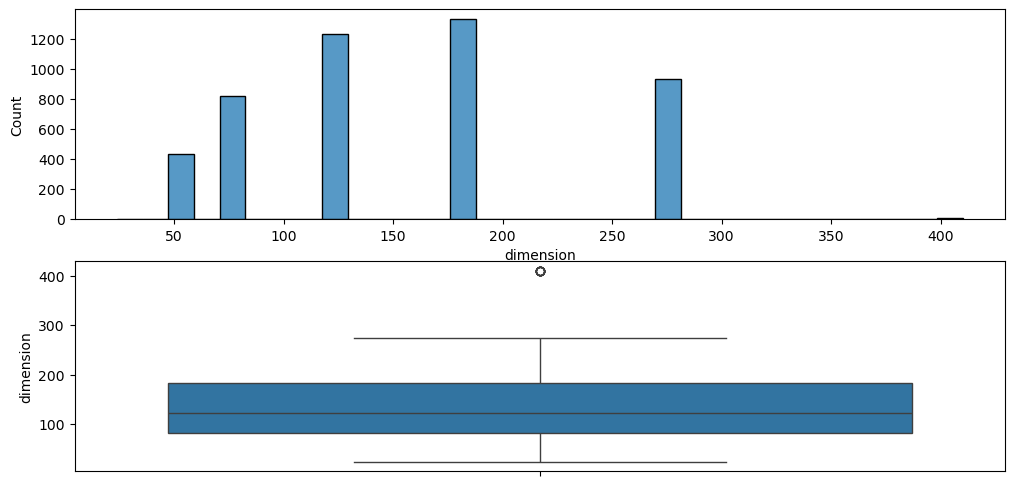

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(df['dimension'])
plt.subplot(2,1,2)
sns.boxplot(df['dimension'])

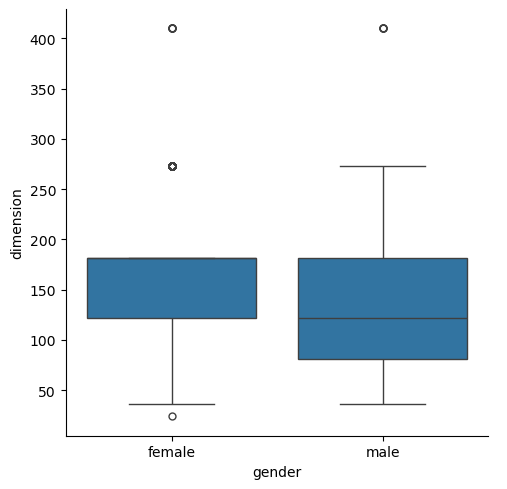

In [20]:
sns.catplot(data=df,x='gender',y='dimension',kind='box')

In [21]:
 df_filter = df.query('dimension > 60')

In [22]:
df_filter.shape

(4321, 3)

In [23]:
df_filter['gender'].value_counts()

gender
female    2386
male      1935
Name: count, dtype: int64

In [24]:
df_filter['gender'].value_counts(normalize=True)

gender
female    0.552187
male      0.447813
Name: proportion, dtype: float64

In [25]:
df_filter

,filepath,gender,dimension
0,./crop_data/female\female_0.jpg,female,273
1,./crop_data/female\female_1.jpg,female,273
2,./crop_data/female\female_100.jpg,female,122
3,./crop_data/female\female_1002.jpg,female,122
4,./crop_data/female\female_1005.jpg,female,182
...,...,...,...
2168,./crop_data/male\male_991.jpg,male,273
2170,./crop_data/male\male_994.jpg,male,122
2172,./crop_data/male\male_997.jpg,male,122
2173,./crop_data/male\male_998.jpg,male,81


# Structure the images

- 100 x 100

In [39]:
def structuring(path):
    try:
        # step-1: read image
        img = cv2.imread(path)
        
        # step-2: convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # step-3: resize into 100 X 100
        # cv2.INTER_CUBIC (ENLARGE)
        size = gray.shape[0]
        if size >= 100:
            # cv2.INTER_AREA (SHRINK)
            gray_resize = cv2.resize(gray,(100,100), cv2.INTER_AREA)
        else:
            # cv2.INTER_CUBIC (ENLARGE)
            gray_resize = cv2.resize(gray,(100,100), cv2.INTER_CUBIC)
        
        # step-4: flatten image (1 X 10,000)
        flatten_image = gray_resize.flatten()
        return flatten_image

    except:
        return None

In [40]:
df_filter['data'] = df_filter['filepath'].apply(structuring)

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_6484\3317895246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['data'] = df_filter['filepath'].apply(structuring)


In [41]:
df_filter.head()

,filepath,gender,dimension,data
0,./crop_data/female\female_0.jpg,female,273,"[200, 189, 188, 181, 184, 185, 179, 176, 189, ..."
1,./crop_data/female\female_1.jpg,female,273,"[234, 236, 235, 241, 198, 186, 114, 16, 45, 35..."
2,./crop_data/female\female_100.jpg,female,122,"[49, 49, 35, 34, 42, 40, 35, 39, 71, 62, 46, 4..."
3,./crop_data/female\female_1002.jpg,female,122,"[137, 128, 114, 96, 96, 95, 93, 114, 150, 163,..."
4,./crop_data/female\female_1005.jpg,female,182,"[234, 236, 231, 231, 231, 185, 142, 111, 52, 4..."


In [42]:
data = df_filter['data'].apply(pd.Series)


In [43]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,200,189,188,181,184,185,179,176,189,180,...,109,106,108,111,113,115,120,117,118,122
1,234,236,235,241,198,186,114,16,45,35,...,21,18,18,17,21,29,23,31,40,38
2,49,49,35,34,42,40,35,39,71,62,...,210,230,231,237,238,230,220,212,210,208
3,137,128,114,96,96,95,93,114,150,163,...,66,53,68,67,74,92,97,103,102,96
4,234,236,231,231,231,185,142,111,52,45,...,241,240,236,237,239,237,237,242,241,241


In [44]:
data.columns = [f"pixel_{i}" for i in data.columns]

In [45]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,200,189,188,181,184,185,179,176,189,180,...,109,106,108,111,113,115,120,117,118,122
1,234,236,235,241,198,186,114,16,45,35,...,21,18,18,17,21,29,23,31,40,38
2,49,49,35,34,42,40,35,39,71,62,...,210,230,231,237,238,230,220,212,210,208
3,137,128,114,96,96,95,93,114,150,163,...,66,53,68,67,74,92,97,103,102,96
4,234,236,231,231,231,185,142,111,52,45,...,241,240,236,237,239,237,237,242,241,241


In [46]:
data = data/255.0

In [47]:
data['gender'] = df_filter['gender']

In [48]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.784314,0.741176,0.737255,0.709804,0.721569,0.725490,0.701961,0.690196,0.741176,0.705882,...,0.415686,0.423529,0.435294,0.443137,0.450980,0.470588,0.458824,0.462745,0.478431,female
1,0.917647,0.925490,0.921569,0.945098,0.776471,0.729412,0.447059,0.062745,0.176471,0.137255,...,0.070588,0.070588,0.066667,0.082353,0.113725,0.090196,0.121569,0.156863,0.149020,female
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,female
3,0.537255,0.501961,0.447059,0.376471,0.376471,0.372549,0.364706,0.447059,0.588235,0.639216,...,0.207843,0.266667,0.262745,0.290196,0.360784,0.380392,0.403922,0.400000,0.376471,female
4,0.917647,0.925490,0.905882,0.905882,0.905882,0.725490,0.556863,0.435294,0.203922,0.176471,...,0.941176,0.925490,0.929412,0.937255,0.929412,0.929412,0.949020,0.945098,0.945098,female


In [51]:
data.isnull().sum().sum()

0

In [52]:
## remove missing values
data.dropna(inplace=True)

In [53]:
data.shape

(4321, 10001)

Save the data for future study

In [54]:
import pickle

In [55]:
pickle.dump(data, open("./data/data_images_100_100.pickle", mode='wb'))